<a href="https://colab.research.google.com/github/SreyaSalil/IR-Assignments/blob/main/Project_Image_Search_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Search Engine**

*We implement an image retrieval system using Tensorflow and Numpy. The system consists of an image query and an image dataset. We input an image query, extract it's features and calculate the similarity (using Euclidean distance) with the other images in the dataset. We then display 30 images that are similar to the image query*

## Import Libraries

In [56]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os

## Mount Image Database from drive

In [57]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Feature Extractor Class

In [58]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

## Iterate through images in database and extract features

In [59]:
images=os.listdir("/content/drive/MyDrive/ImageSearchEngine/dataset")

In [ ]:
# Run only once; Takes about an hour

fe=FeatureExtractor()
# Iterate through images (Change the path based on your image location)
datasetPath="/content/drive/MyDrive/ImageSearchEngine/dataset/"
images=os.listdir(datasetPath)
for img_path in sorted(images):
    print(img_path)
    name,extension=os.path.splitext(os.path.basename(img_path))
    # Extract Features
    feature = fe.extract(img=Image.open(datasetPath+img_path))
    # Save the Numpy array (.npy) on designated path
    feature_path = "/content/drive/My Drive/ImageSearchEngine/npy/"+name+".npy"
    np.save(feature_path, feature)

## Accept Image query and extract features

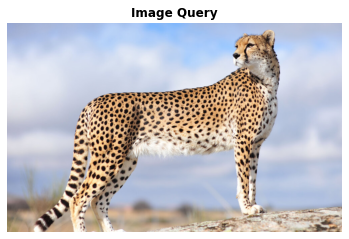

In [61]:
# Insert the image query and display it
img = Image.open("/content/drive/MyDrive/ImageSearchEngine/ImageQuery.jpg")
plt.imshow(img)
plt.title('Image Query',fontweight ="bold")
plt.axis('off')

# Extract its features
query = fe.extract(img)

## Calculate Euclidean distances and obtain results


In [62]:
feature_folder = "/content/drive/My Drive/ImageSearchEngine/npy/"
features = []
img_paths = []

for feature_path in Path(feature_folder).glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/My Drive/ImageSearchEngine/dataset/") / (feature_path.stem + ".jpg"))

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

## Visulaize Results

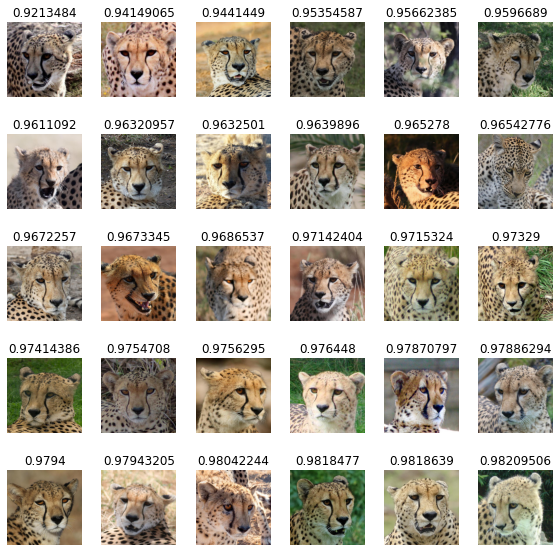

In [63]:
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()